In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:

# Now going to use Tenserflow's data set ie, to download 
# this images into tf.data.dataset, beacause to understand
# by ML models , we have to load the datasets from disc to RAM.thus it is in the form if some kind of numbers

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

EPOCHS = 50

In [5]:
# we can load the image with this API's

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
68*32

2176

In [9]:
# Here understanding the batch_size,height width,channels
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[1 1 2 1 0 2 0 1 0 1 1 0 2 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0]


In [10]:
# Here looked 1st image as indexed to [0], and usulay comes in Tesor and converted to numpy(),ie, we can see the numbers between 0 to 255.
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    

[[[189. 184. 190.]
  [192. 187. 193.]
  [195. 190. 196.]
  ...
  [176. 173. 180.]
  [181. 178. 185.]
  [186. 183. 190.]]

 [[188. 183. 189.]
  [191. 186. 192.]
  [193. 188. 194.]
  ...
  [184. 181. 188.]
  [183. 180. 187.]
  [183. 180. 187.]]

 [[188. 183. 189.]
  [191. 186. 192.]
  [192. 187. 193.]
  ...
  [189. 186. 193.]
  [182. 179. 186.]
  [177. 174. 181.]]

 ...

 [[153. 146. 153.]
  [126. 119. 126.]
  [147. 140. 147.]
  ...
  [158. 150. 161.]
  [127. 119. 130.]
  [123. 115. 126.]]

 [[135. 128. 135.]
  [133. 126. 133.]
  [153. 146. 153.]
  ...
  [122. 114. 125.]
  [159. 151. 162.]
  [126. 118. 129.]]

 [[164. 157. 164.]
  [145. 138. 145.]
  [168. 161. 168.]
  ...
  [135. 127. 138.]
  [131. 123. 134.]
  [154. 146. 157.]]]


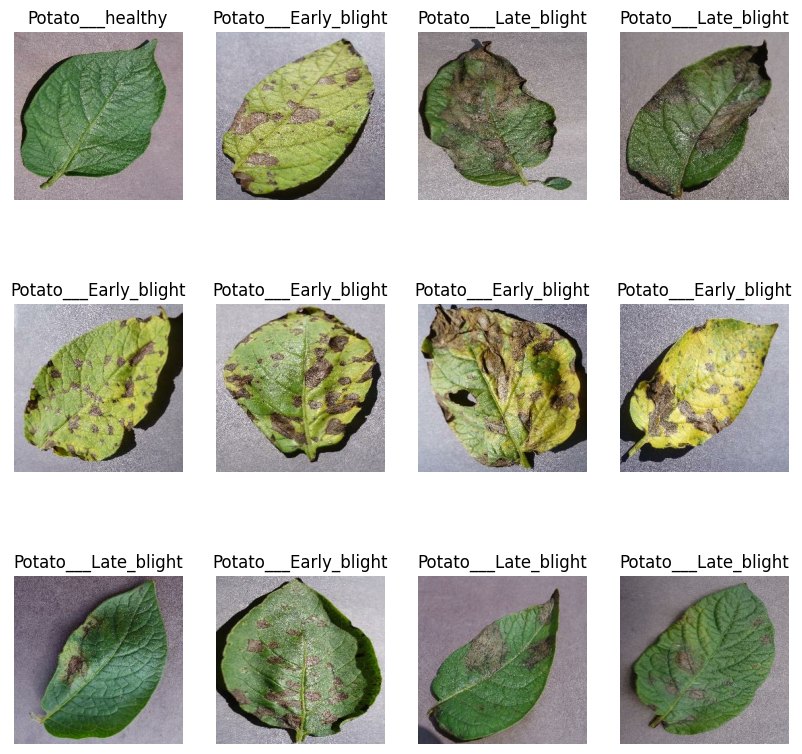

In [11]:
#Now lets visualize the first image.

plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):                                                     # for showing 12 images of first batch
        plt.subplot(3,4,i+1)                                                # row, col, index
        plt.imshow(image_batch[i].numpy().astype("uint8"))                  #imshow() expects 3D array, in here it is "image_batch[0].numpy()" it is the first image
                                                                            #as its float adding astype("uint8"),ie, converted to int
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    
    
    

In [12]:
#SPLIT OUR DATASET TO INTO TRAIN OUT SPLIT

In [13]:
len(dataset)

68

In [32]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [33]:
# in tensorflow we dont have train test split as in ML theirfore

In [34]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [35]:
#therefore we take 54.4000
train_dataset = dataset.take(54)
len(train_dataset)

54

In [36]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [37]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [38]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [39]:
test_DS = test_ds.skip(6)
len(test_DS)

8

In [40]:
def get_dataset_partitions_tf(ds,train_split = 0.8 ,val_split = 0.1 ,test_split = 0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    #test_size = int(test_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    
    return train_ds,val_ds,test_ds

In [41]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)